# Задача 1. Разведочный анализ

* **Дедлайн**: 08.10.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [x] Считать данные и вывести их основные характеристики, описание признаков.
- [x] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [x] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [x] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [x] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [x] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Описание датасета

Датасет содержит информацию о приложениях на Google Play Store

Признаки:

* `App`: Название приложения
* `Category`: Категория приложения
* `Rating`: Рейтинг приложения
* `Reviews`: Количество отзывов
* `Size`: Размер приложения
* `Installs`: Количество установок
* `Type`: Бесплатное или платное приложение
* `Price`: Цена приложения
* `Content Rating`: Возрастная категория приложения
* `Genres`: Жанры приложения
* `Last Updated`: Дата последнего обновления
* `Current Ver`: Текущая версия
* `Android Ver`: Минимальная версия Android, необходимая для работы приложения


Будем решать задачу регрессии: пытаться предсказать рейтинг приложения по остальным признакам

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

Для начала удалим ненужные столбцы:

In [4]:
df = df.drop(columns=["App", "Last Updated", "Current Ver", "Android Ver"])

Посмотрим, какие значения отсутствуют в датасете:

In [5]:
df.isnull().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

Вероятно, отсутствие рейтинга эквивалетно 0. Тем не менее, для адекватного анализа заполним данные, беря среднее значение по категории:

In [6]:
df["Rating"] = df.groupby("Category")["Rating"].transform(lambda x: x.fillna(x.mean()))

Заполним пропущенное поле `Type`:

In [7]:
df["Type"].fillna("Free", inplace=True)

Существует записи со значением рейтинга больше пяти, расммотрим их:

In [8]:
df[df['Rating'] > 5]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


Всего одна запись. Вероятно, просто ошибка, поэтому удалим ее из датасета.

In [9]:
df = df.drop(df[df['Rating'] > 5].index)

Замечаем также некорректное заполнение Installs: Free. Проверим, есть ли ещё поля с подобной ошибкой:

In [10]:
df[df['Installs'] == 'Free']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


Остальные столбцы поля выше тоже заполнены некорректно, но сделаем вывод, что это единственное некорректное поле.

## Feature Engineering

In [11]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


Преобразуем данные, убрав лишние символы:

Приведём столбец `Installs` к более простому виду.

In [12]:
df["Installs"] = df["Installs"].apply(lambda x: x.replace("+", "") if "+" in x else x)
df["Installs"] = df["Installs"].apply(lambda x: x.replace(",", "") if "," in x else x)
df["Installs"] = pd.to_numeric(df["Installs"])

Удалим значок доллара в столбце `Price`.

In [13]:
df["Price"] = df["Price"].apply(lambda x: x.replace("$", "") if "$" in x else x)
df["Price"] = pd.to_numeric(df["Price"])

Приведём столбец `Size` в общий вид.

In [14]:
df["Size"] = df["Size"].apply(lambda x: x.replace("M", "") if "M" in x else x)
df["Size"] = df["Size"].apply(lambda x: x.replace("k", "e-3") if "k" in x else x)
df["Size"] = df["Size"].apply(lambda x: x.replace("Varies with device", "0") if "Varies with device" in x else x)
df["Size"] = pd.to_numeric(df["Size"], errors="coerce")
df["Size"] = df["Size"].apply(lambda x: x * 1e-3 if "e-3" in str(x) else x)

In [15]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


## Анализ признаков

Рассмотрим распределение рейтингов:

<AxesSubplot: xlabel='Rating', ylabel='Count'>

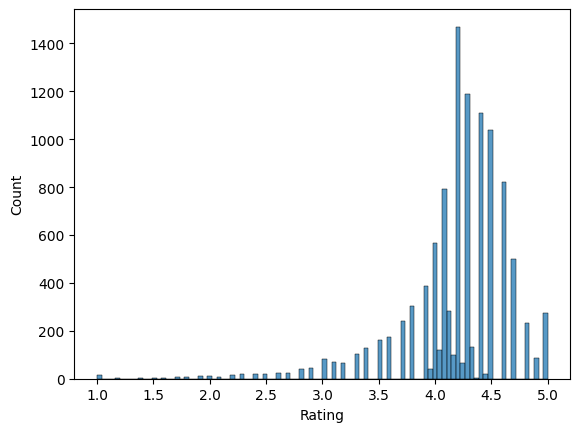

In [16]:
sns.histplot(df["Rating"])

Как и ожидалось, большая часть приложений не имеет оценок. Не считая их, в среднем рейтинг колеблится между 4 и 4.8.

Вероятно, выставление оценки приложению зависит от возрастной категории, поскольку критерии,
понравится ли приложение пользователю, вполне вероятно могут зависить от возраста:

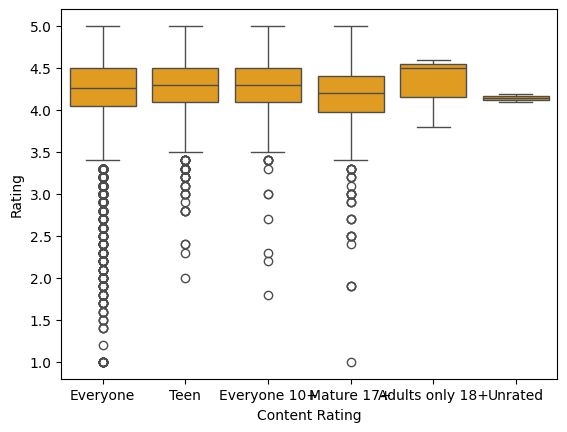

In [17]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey=True)
sns.boxplot(df, x="Content Rating", y="Rating", ax=ax1, color="orange")
plt.xlabel("Content Rating")
plt.ylabel("Rating")
plt.show()

Больших различий между возрастной категорией при оценки рейтинга нет.

Также проверим, как меняется рейтинг в зависимости от того, является ли приложение платным:

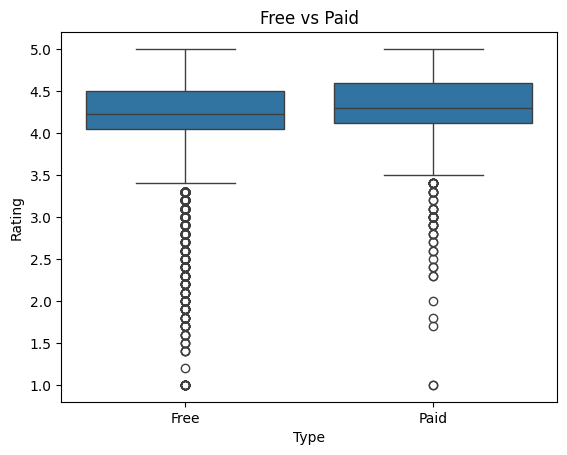

In [18]:
plt.figure()
sns.boxplot(x="Type", y="Rating", data=df)
plt.title("Free vs Paid")
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()

Также больших различий не обнаружено.

Закодируем значения:

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Category"] = le.fit_transform(df["Category"])
df["Type"] = le.fit_transform(df["Type"])
df["Content Rating"] = le.fit_transform(df["Content Rating"])
df["Genres"] = le.fit_transform(df["Genres"])
df["Reviews"] = le.fit_transform(df["Reviews"])

In [20]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,1182,19.0,10000,0,0.0,1,9
1,0,3.9,5922,14.0,500000,0,0.0,1,12
2,0,4.7,5679,8.7,5000000,0,0.0,1,9
3,0,4.5,1946,25.0,50000000,0,0.0,4,9
4,0,4.3,5922,2.8,100000,0,0.0,1,11


Наконец, построим корреляционную матрицу

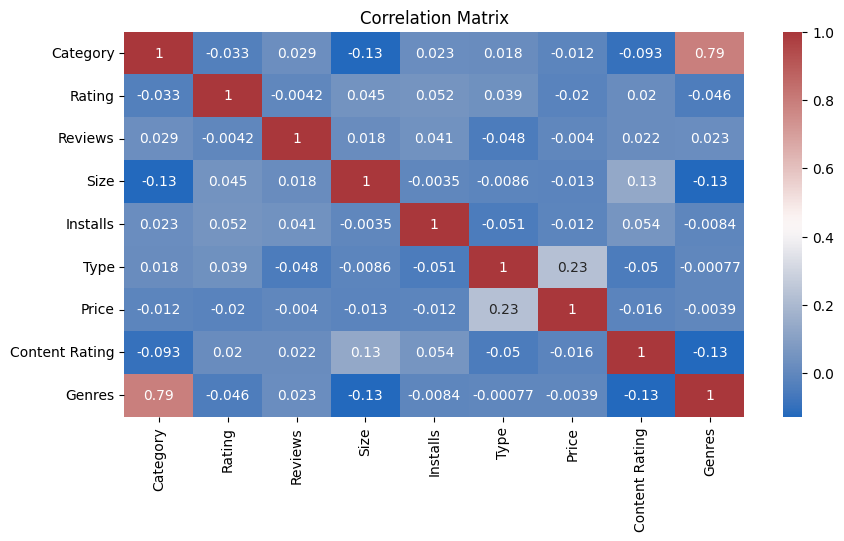

In [21]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="vlag")
plt.title("Correlation Matrix")
plt.show()

Помимо очевидных зависимостей, как, например, между жанром и категорией, а также между ценой и типом приложения, значимых корелляций не обнаружено.